# ANÁLISIS DE SENTIMIENTOS

## UTILIDADES

In [48]:
import sys

sys.path.append('../..')

In [49]:
from app.services.dataset_service import DatasetService

dataset_service = DatasetService()

In [50]:
import requests
import pandas as pd

def post(url: str):
    payload={}
    headers = {}
    response = requests.request("POST", url, headers=headers, data=payload)
    return response.json()

## ANÁLISIS

In [51]:
custom_evaluation_url = 'http://localhost:8000/analysis/custom_evaluation'
metrics_custom_url = 'http://localhost:8000/analysis/metrics_custom'

### Dataset original

#### Clasificación

In [57]:
url = f'{custom_evaluation_url}?file_path=cle_respuestas_form_1671774115.csv'
file_original = post(url)['file_path']

#### Métricas

In [58]:
url = f'{metrics_custom_url}?file_path={file_original}'
file_original = post(url)['file_path']
df_original = dataset_service.read_dataset(
    file_path=f'../../resources/metrics/{file_original}',
    encoding='utf-8',
    delimiter=','
)
df_original.head()


,algorithm,accuracy,sensitivity,specificity,kappa,f1,precision,tp,fp,tn,fn,auc
0,nearest_neighbors,0.652174,0.705882,0.500000,0.185841,0.750000,0.800000,12,5,3,3,0.588235
1,linear_svm,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17,0,6,0,1.000000
2,rbf_svm,0.739130,1.000000,0.000000,0.000000,0.850000,0.739130,17,0,0,6,0.500000
3,gaussian_process,0.565217,0.705882,0.166667,-0.127451,0.705882,0.705882,12,5,1,5,0.490196
4,decision_tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17,0,6,0,1.000000


### Dataset balanceado

#### Clasificación

In [59]:
url = f'{custom_evaluation_url}?file_path=bal_cle_respuestas_form_1671774115.csv'
file_balanced = post(url)['file_path']

#### Métricas

In [60]:
url = f'{metrics_custom_url}?file_path={file_balanced}'
file_balanced = post(url)['file_path']
df_balanced = dataset_service.read_dataset(
    file_path=f'../../resources/metrics/{file_balanced}',
    encoding='utf-8',
    delimiter=','
)
df_balanced.head()

,algorithm,accuracy,sensitivity,specificity,kappa,f1,precision,tp,fp,tn,fn,auc
0,nearest_neighbors,0.548387,0.6,0.5000,0.099585,0.562500,0.529412,9,6,8,8,0.531250
1,linear_svm,1.000000,1.0,1.0000,1.000000,1.000000,1.000000,15,0,16,0,1.000000
2,rbf_svm,0.483871,1.0,0.0000,0.000000,0.652174,0.483871,15,0,0,16,0.437500
3,gaussian_process,0.516129,0.6,0.4375,0.037267,0.545455,0.500000,9,6,7,9,0.558333
4,decision_tree,1.000000,1.0,1.0000,1.000000,1.000000,1.000000,15,0,16,0,1.000000


### Dataset original con extracción de características

#### Clasificación

In [64]:
url = f'{custom_evaluation_url}?file_path=ext_cle_respuestas_form_1671774115.csv'
file_original_ext = post(url)['file_path']

#### Métricas

In [65]:
url = f'{metrics_custom_url}?file_path={file_original_ext}'
file_original_ext = post(url)['file_path']
df_original_ext = dataset_service.read_dataset(
    file_path=f'../../resources/metrics/{file_original_ext}',
    encoding='utf-8',
    delimiter=','
)
df_original_ext.head()

,algorithm,accuracy,sensitivity,specificity,kappa,f1,precision,tp,fp,tn,fn,auc
0,nearest_neighbors,0.956522,0.941176,1.0,0.893023,0.969697,1.00000,16,1,6,0,0.985294
1,linear_svm,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,17,0,6,0,1.000000
2,rbf_svm,0.739130,1.000000,0.0,0.000000,0.850000,0.73913,17,0,0,6,0.078431
3,gaussian_process,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,17,0,6,0,1.000000
4,decision_tree,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,17,0,6,0,1.000000


### Dataset balanceado con extracción de características

#### Clasificación

In [62]:
url = f'{custom_evaluation_url}?file_path=ext_bal_cle_respuestas_form_1671774115.csv'
file_balanced_ext = post(url)['file_path']

#### Métricas

In [63]:
url = f'{metrics_custom_url}?file_path={file_balanced_ext}'
file_balanced_ext = post(url)['file_path']
df_balanced_ext = dataset_service.read_dataset(
    file_path=f'../../resources/metrics/{file_balanced_ext}',
    encoding='utf-8',
    delimiter=','
)
df_balanced_ext.head()

,algorithm,accuracy,sensitivity,specificity,kappa,f1,precision,tp,fp,tn,fn,auc
0,nearest_neighbors,0.806452,0.6,1.0,0.607595,0.750000,1.000000,9,6,16,0,0.98750
1,linear_svm,1.000000,1.0,1.0,1.000000,1.000000,1.000000,15,0,16,0,1.00000
2,rbf_svm,0.483871,1.0,0.0,0.000000,0.652174,0.483871,15,0,0,16,0.21875
3,gaussian_process,1.000000,1.0,1.0,1.000000,1.000000,1.000000,15,0,16,0,1.00000
4,decision_tree,1.000000,1.0,1.0,1.000000,1.000000,1.000000,15,0,16,0,1.00000


## COMPARACIÓN DE ALGORITMOS

In [150]:
metrics = [
    'accuracy',
    'sensitivity',
    'specificity',
    'auc',
    'kappa',
    'f1',
    'precision'
]

counts = ['tp', 'fp', 'tn', 'fn']

<AxesSubplot: xlabel='algorithm'>

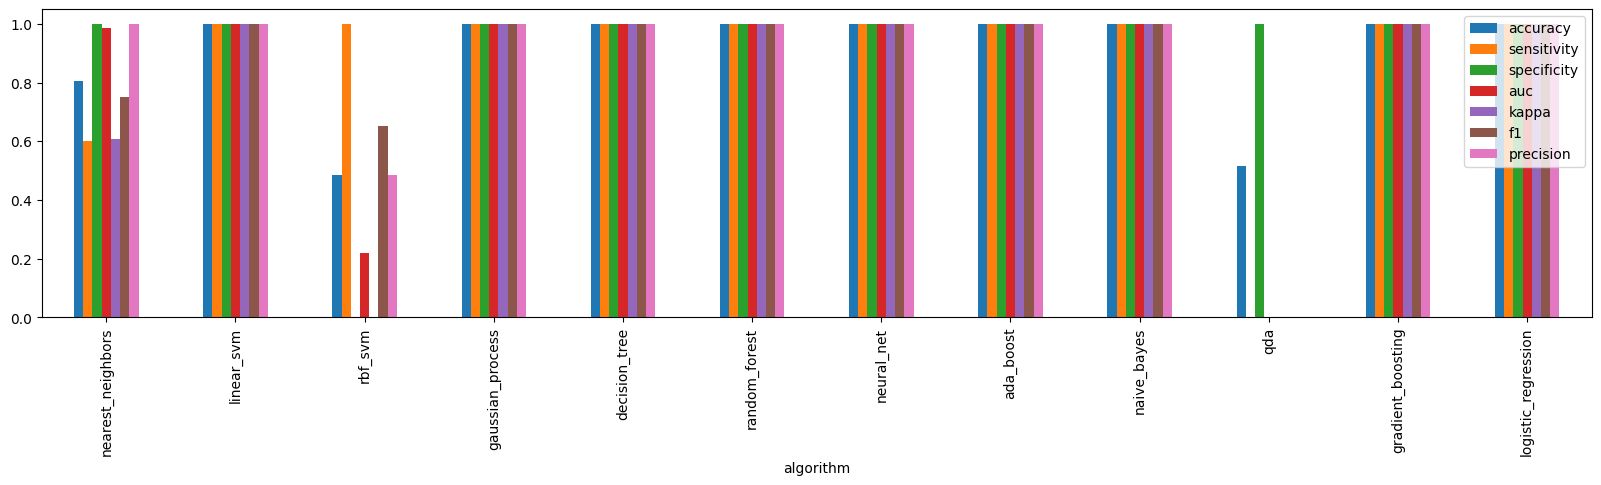

In [151]:
df_balanced_ext[['algorithm'] + metrics].plot.bar(
    x='algorithm',
    figsize=(20, 4)
)

<AxesSubplot: xlabel='algorithm'>

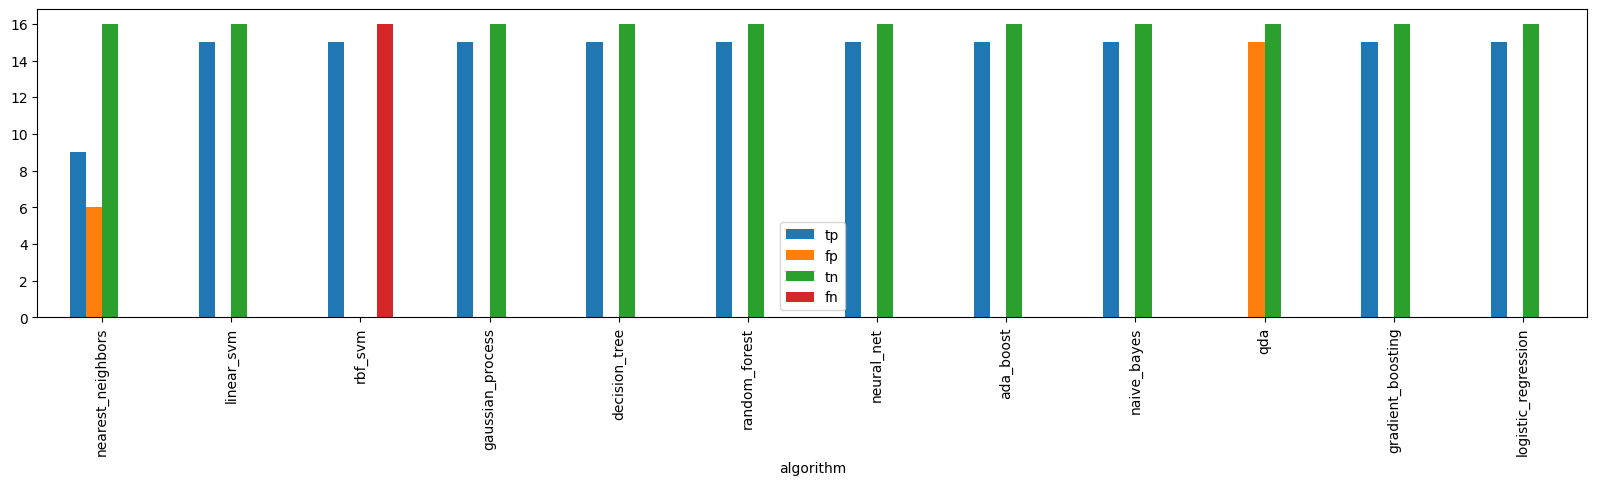

In [152]:
df_balanced_ext[['algorithm'] + counts].plot.bar(
    x='algorithm',
    figsize=(20, 4)
)

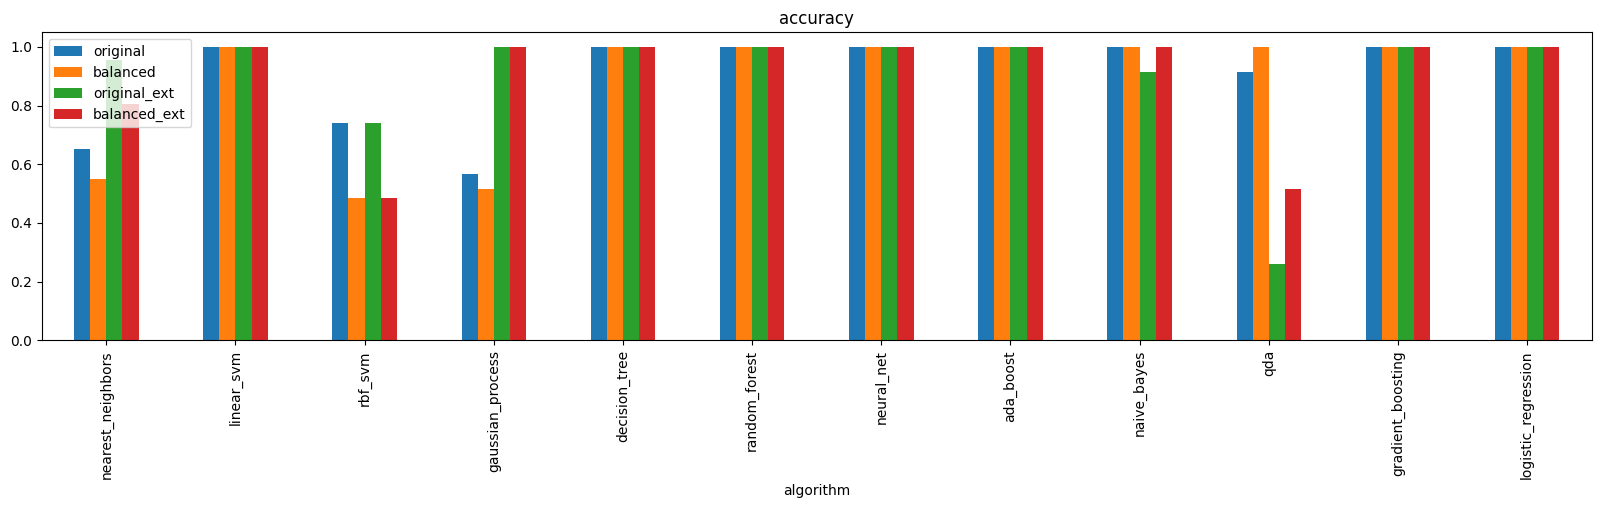

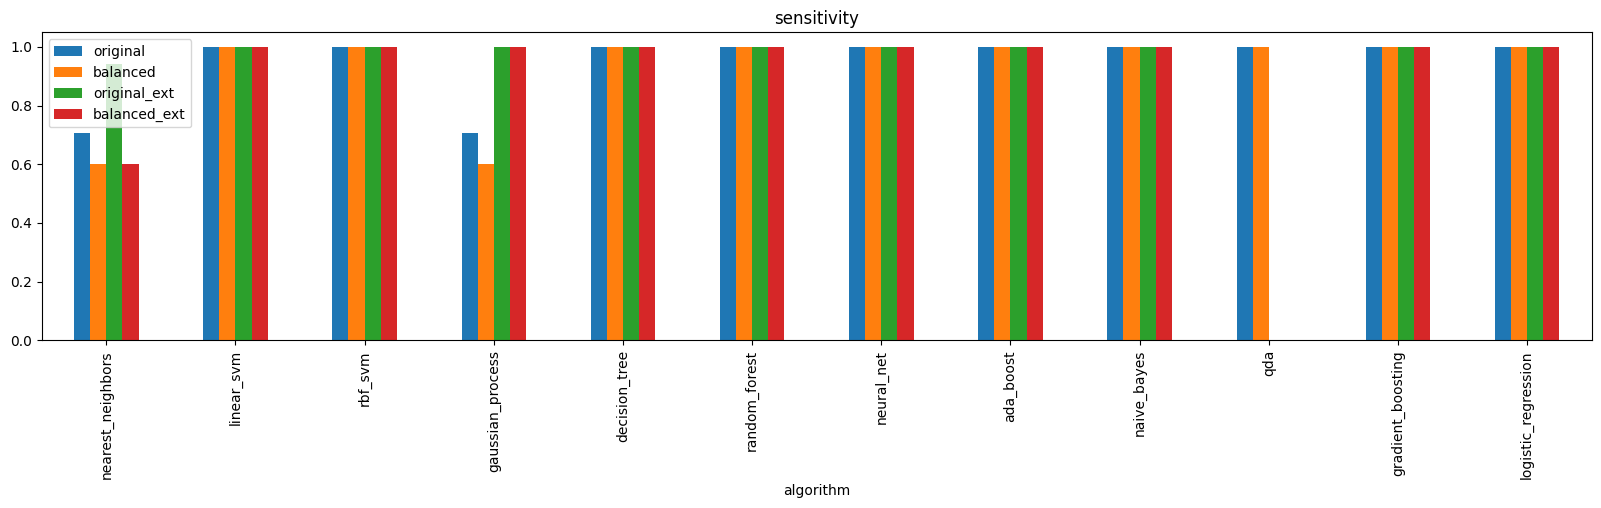

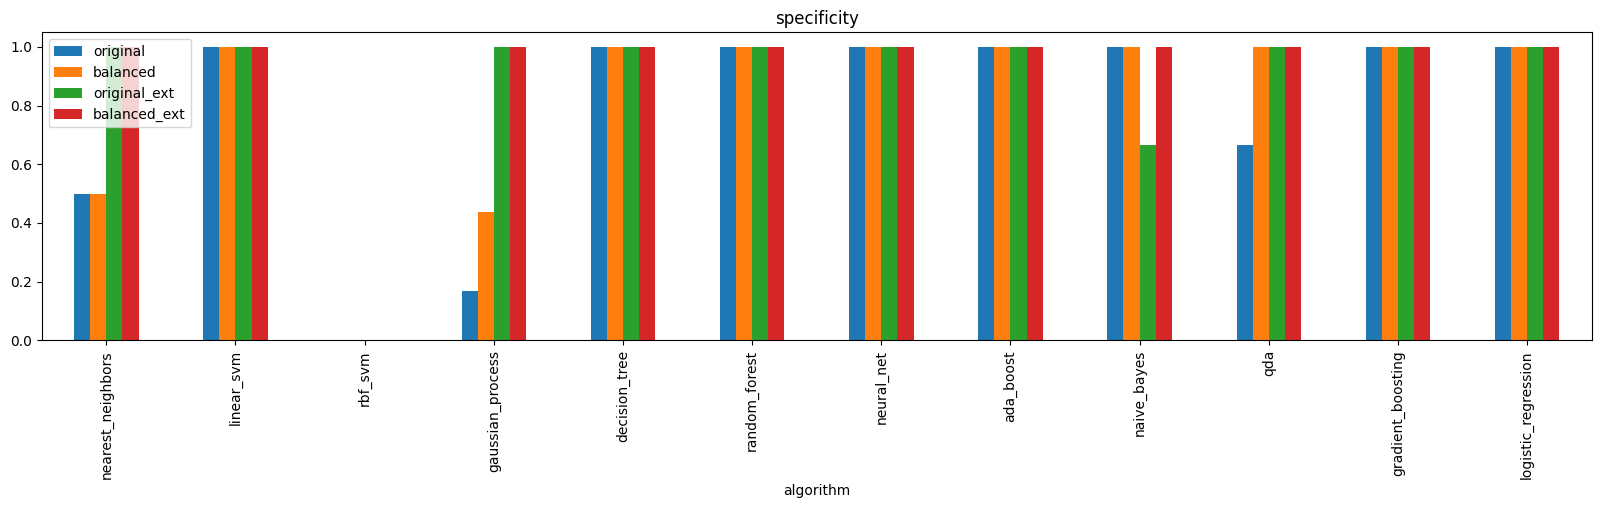

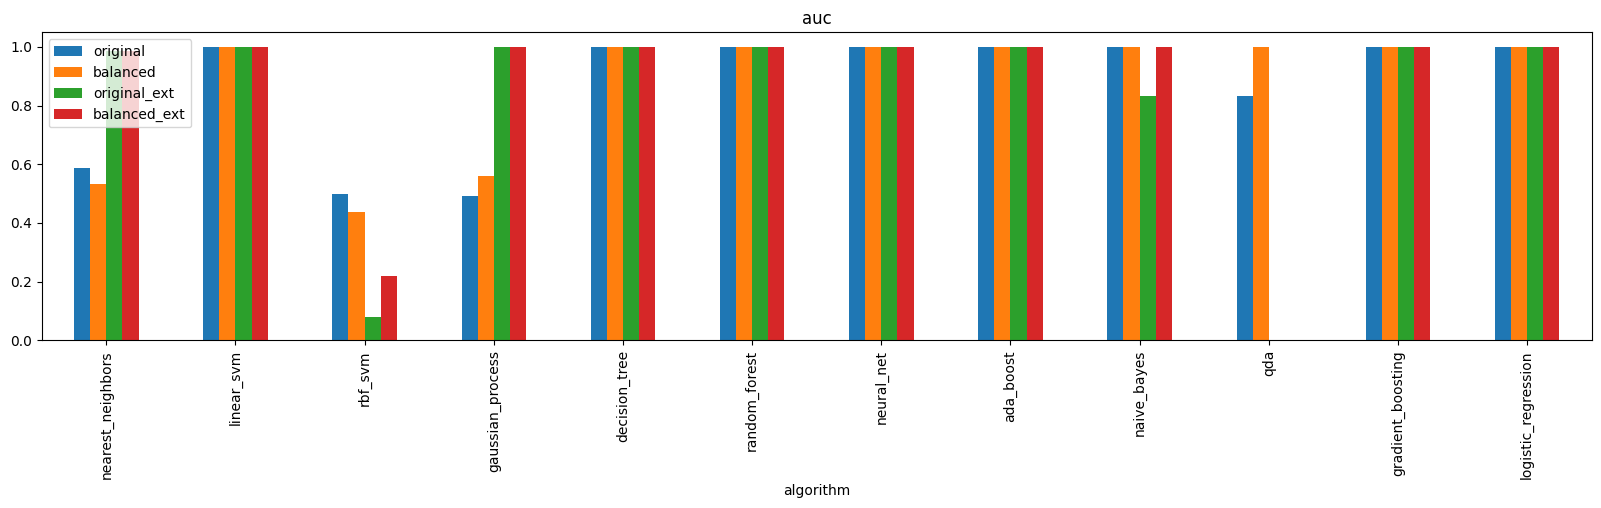

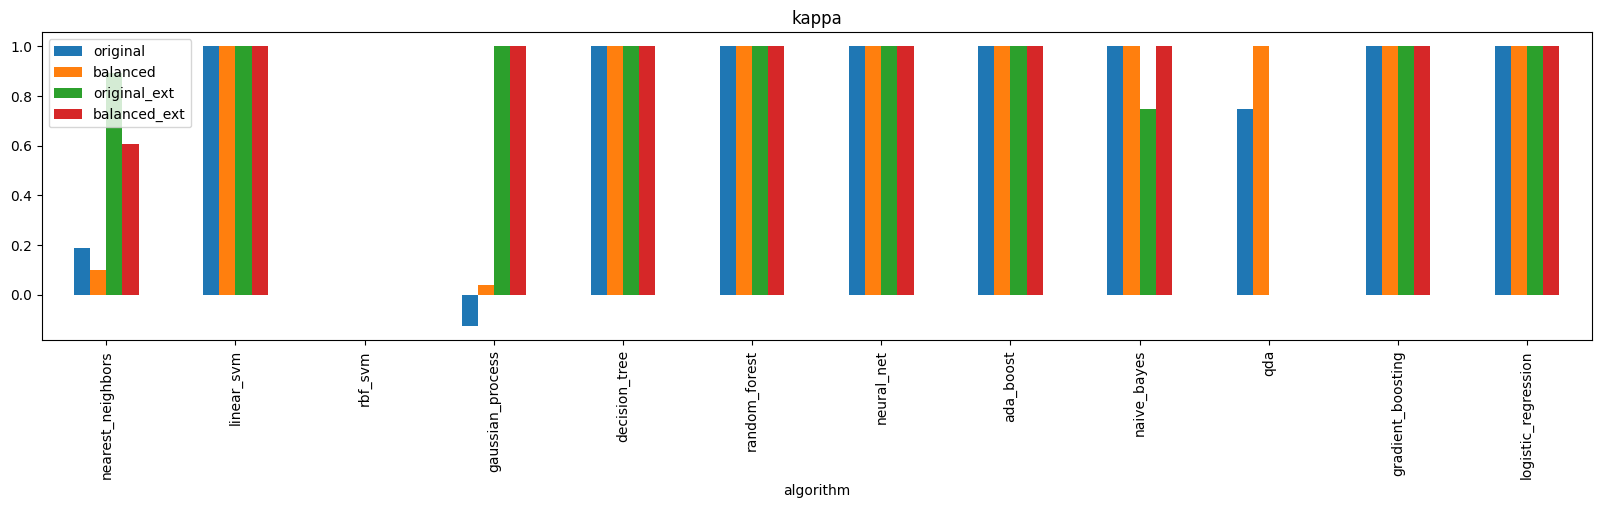

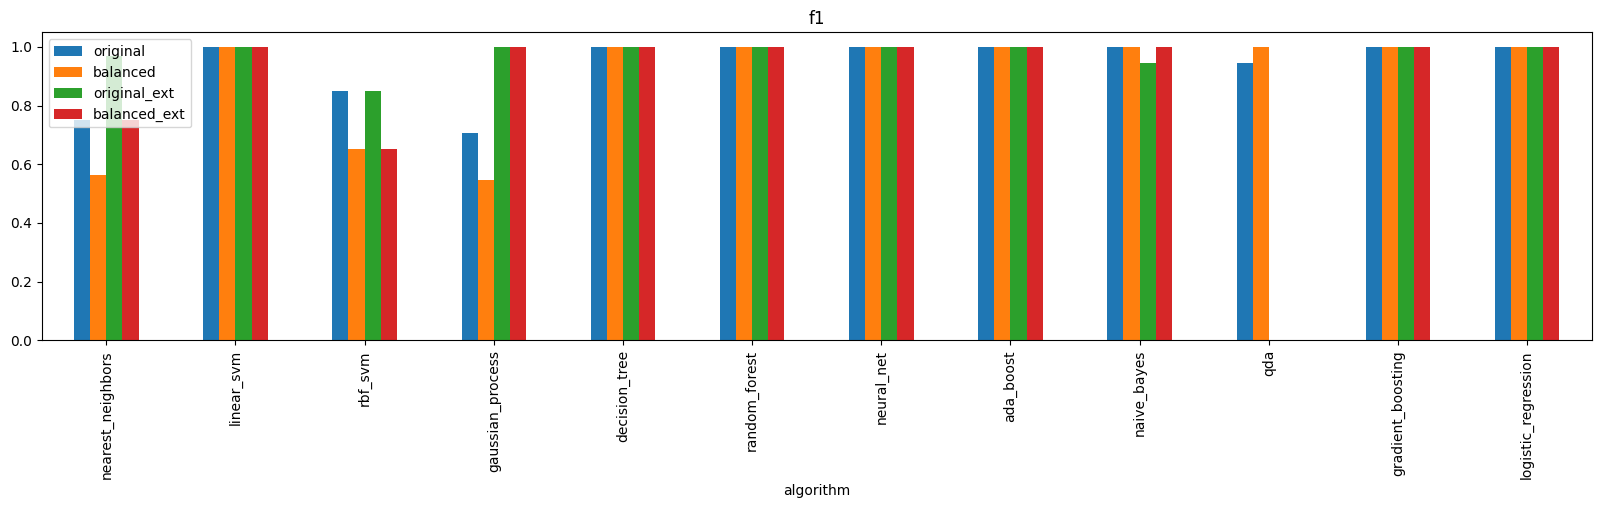

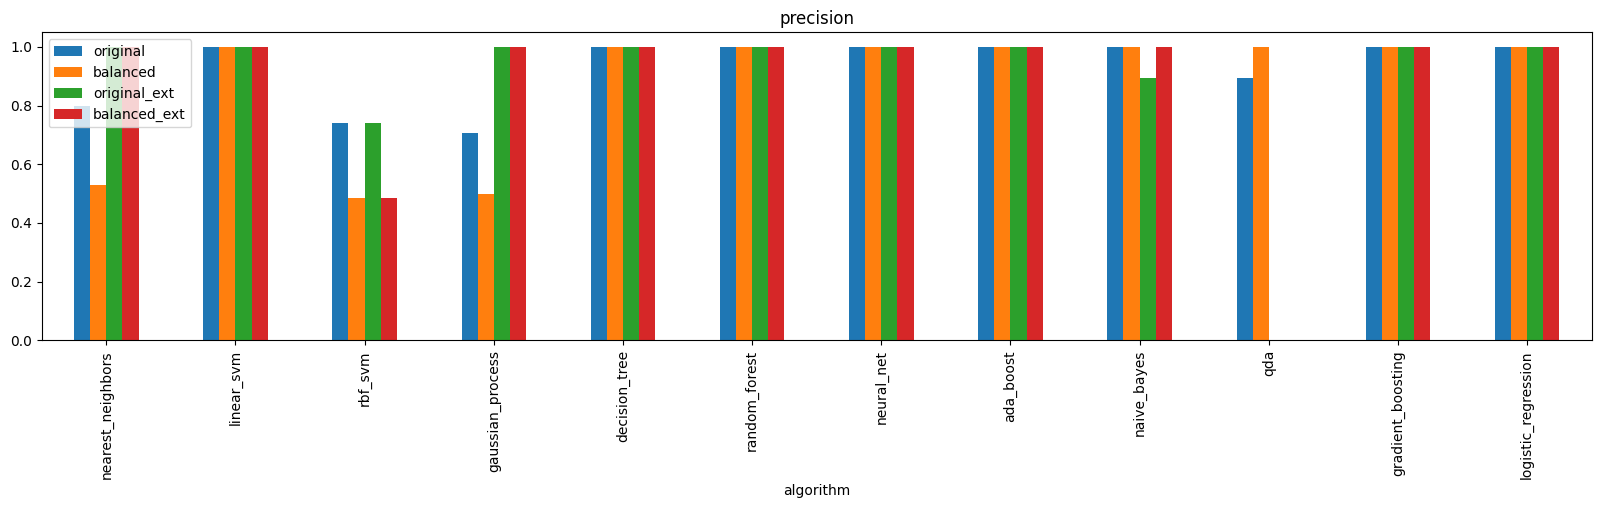

In [155]:


for metric in metrics:
    df = pd.DataFrame(
        data=[],
        columns=['algorithm', 'original', 'balanced',
                 'original_ext', 'balanced_ext']
    )

    df['algorithm'] = df_original['algorithm']
    df['original'] = df_original[metric]
    df['balanced'] = df_balanced[metric]
    df['original_ext'] = df_original_ext[metric]
    df['balanced_ext'] = df_balanced_ext[metric]

    df.plot.bar(
        x='algorithm',
        figsize=(20, 4),
        title=f'{metric}'
    )
